In [2]:
import pandas as pd 
df = pd.read_csv('car-prices.csv')
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
sold_swap = {
    'yes' : 1,
    'no' : 0
}
df['sold'] = df['sold'].map(sold_swap)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,NaN
1,1,7843,1998,40557.96,NaN
2,2,7109,2006,89627.50,NaN
3,3,26823,2015,95276.14,NaN
4,4,7935,2014,117384.68,NaN


In [6]:
df['model_age'] = 2020 - df['model_year']
df['km_per_year'] = df['mileage_per_year'] = 1.60934
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,1.60934,2000,30941.02,NaN,20,1.60934
1,1,1.60934,1998,40557.96,NaN,22,1.60934
2,2,1.60934,2006,89627.50,NaN,14,1.60934
3,3,1.60934,2015,95276.14,NaN,5,1.60934
4,4,1.60934,2014,117384.68,NaN,6,1.60934


In [9]:
x = df[['price', 'model_age', 'km_per_year']]
y = df['sold']

In [19]:
seed = pd.np.random.seed(5)

<ipython-input-19-0843dc0c5cf4>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  seed = pd.np.random.seed(5)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/glossary.html#term-random-state

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

model = SVC(random_state=20)
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy_score(test_y, predicts)

0.7648

In [36]:
from sklearn.dummy import DummyClassifier
import pandas as pd

df = pd.read_csv('car-prices.csv')

sold_swap = {
    'yes': 1,
    'no': 0
}
df['sold'] = df['sold'].map(sold_swap)

df['model_age'] = 2020 - df['model_year']
df['km_per_year'] = df['mileage_per_year'] * 1.60934

df.dropna(inplace=True)

x = df[['price', 'model_age', 'km_per_year']]
y = df['sold']

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

baseline = DummyClassifier()
baseline.fit(train_x, train_y)
baseline.score(test_x, test_y)

C:\Users\Felipe\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.5088

In [37]:
#Felipe Martins Guimarães

from sklearn.dummy import DummyClassifier
import pandas as pd

df = pd.read_csv('car-prices.csv')

sold_swap = {
    'yes': 1,
    'no': 0
}
df['sold'] = df['sold'].map(sold_swap)

df['model_age'] = 2020 - df['model_year']
df['km_per_year'] = df['mileage_per_year'] * 1.60934

df.dropna(inplace=True)

x = df[['price', 'model_age', 'km_per_year']]
y = df['sold']

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

baseline = DummyClassifier()
baseline.fit(train_x, train_y)
baseline.score(test_x, test_y)

C:\Users\Felipe\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.516

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(random_state=20)
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy_score(test_y, predicts)

0.7592

In [39]:
from joblib import dump, load
dump(model, 'teste.joblib')

['teste.joblib']

In [40]:
loaded_model = load('teste.joblib')
predicts = loaded_model.predict(test_x)
accuracy_score(test_y, predicts)

0.7592

In [46]:
#Felipe Martins Guimarães
#decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy_score(test_y, predicts)

0.7024

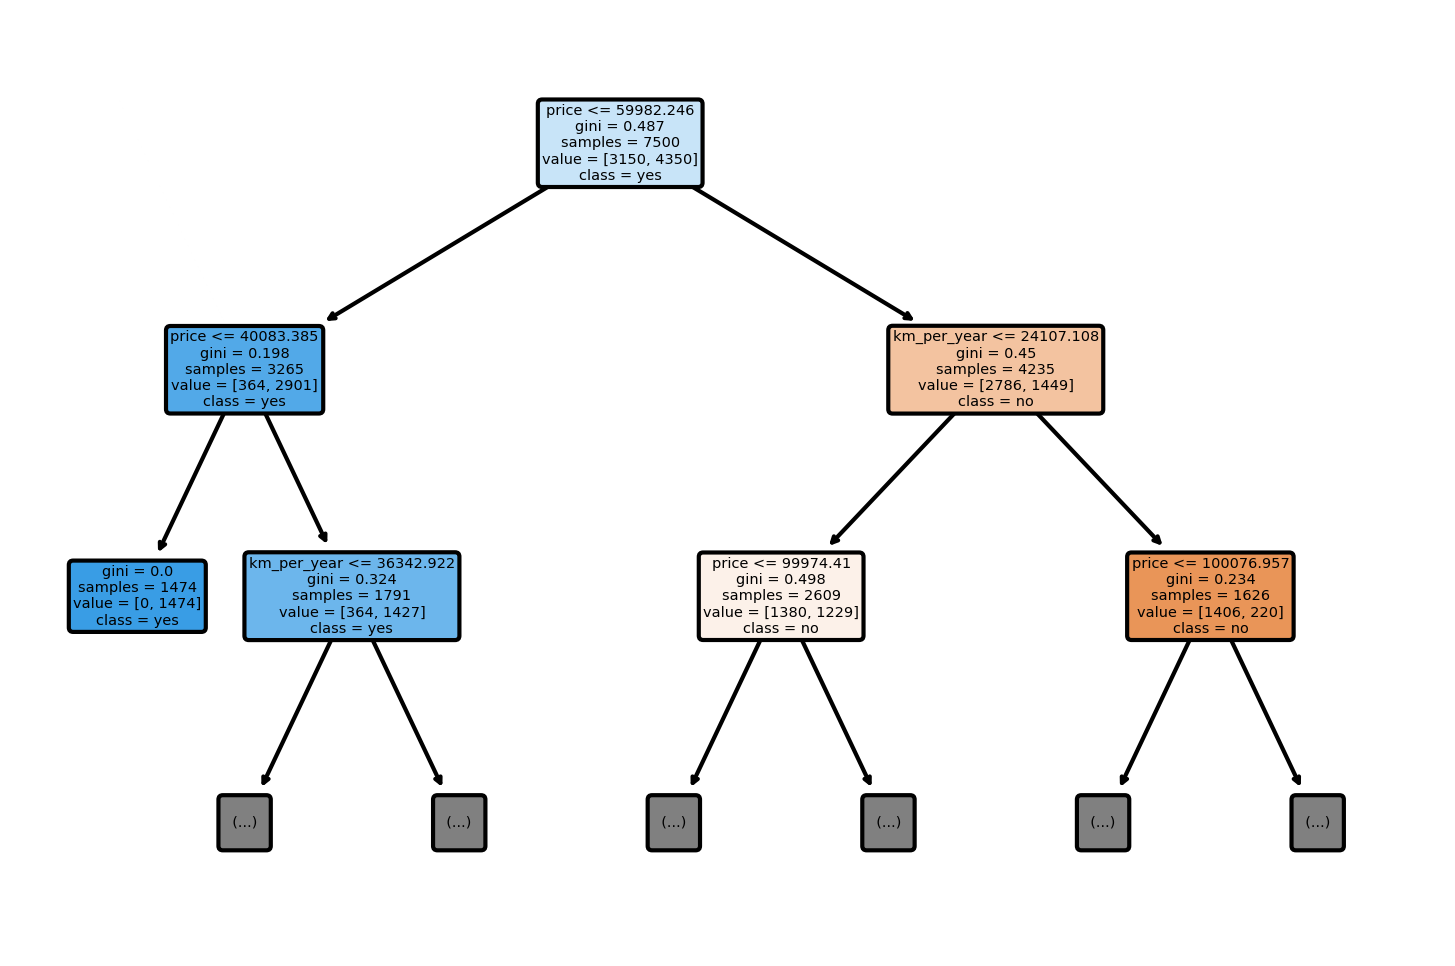

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(dpi=300)
plot_tree(model, max_depth=2, filled=True, rounded=True, feature_names=x.columns, class_names=['no', 'yes'])
plt.show()

In [51]:
x.columns

Index(['price', 'model_age', 'km_per_year'], dtype='object')